![title](../images/header.png)

# Vd - Merging eSBAE with new CEO points
-------
This notebook merges validated data from the systematic grid CEO data (2015-2022) with eSBAE points for estimation of areas.

This script requires minimum an m16 instance and select the python 3 kernel
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set the display option to a large value to prevent text wrapping
pd.set_option('display.max_colwidth', None)

### 1. Enter parameters

In [6]:
#identifier for country
iso = 'CAR'

### Read new CEO merged  files
after you run utils script 1. merge_clean_ceo_data.ipynb

In [7]:
ceo = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/CAR_all_ceo_1522_clean.csv')

2. read all esbae points with augmented data (output from script 5b)

In [8]:
# Read the CSV files
#CAR
esbae = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/CAR_esbae_1520_model.csv')
len(esbae)

525154

make a list of the ceo files for processing

In [60]:
# output file CEO validated data file with correct stratum with only CEO columns - used for area estimation
ceo_sel_data_out =  '/home/sepal-user/module_results/esbae/CAR/CAR_all_ceo_1522_stratified.csv'

In [61]:
# output file for CEO data with new stratum with all eSBAE columns 
ceo_data_out =  '/home/sepal-user/module_results/esbae/CAR/CAR_esbae_allcols_ceo_1522.csv'

In [62]:
# output file name for eSBAE and CEO data merge - all points - caution, large file!
esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/CAR/CAR_esbae_w_ceo_1522.csv'

#### end of parameters

### 2. Clean up CEO and eSBAE data

In [12]:
column_names = ceo.columns.tolist()
# Print the list of column names
print(column_names)

['ID', 'plotid', 'sampleid', 'lon', 'lat', 'sample_geom', 'point_id', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year', 'Ref_NFtype', 'Ref_Ftype', 'collection', 'interpreted', 'Ref_LCover', 'Ref_Change_Year_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF', 'ISO']


In [13]:
columns = esbae.columns.tolist()
# Print the list of column names
print(columns)

['geometry', 'point_id', 'images', 'mon_images', 'bfast_change_date', 'bfast_magnitude', 'bfast_means', 'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean', 'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ewma_jrc_date', 'ewma_jrc_change', 'ewma_jrc_magnitude', 'mosum_jrc_date', 'mosum_jrc_change', 'mosum_jrc_magnitude', 'cusum_jrc_date', 'cusum_jrc_change', 'cusum_jrc_magnitude', 'ccdc_change_date', 'ccdc_magnitude', 'aspect', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 

In [14]:
ceo.head()

,ID,plotid,sampleid,lon,lat,sample_geom,point_id,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year,Ref_NFtype,Ref_Ftype,collection,interpreted,Ref_LCover,Ref_Change_Year_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,ISO
0,0,95846,95846,18.078542,7.506790,POINT(18.078542 7.50679),95846,0,non,0,NF,0,0,0,0,0,0,NaN,0,0,NaN,NaN,12.0,NaN,1,1,12,NF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,CAR
1,1,96933,96933,15.871366,3.284827,POINT(15.871366 3.284827),96933,1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,1.0,1,1,1,Stable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CAR
2,2,98211,98211,17.214811,5.788864,POINT(17.214811 5.788864),98211,0,non,0,NF,0,0,0,0,0,0,NaN,0,0,NaN,NaN,12.0,NaN,1,1,12,NF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,CAR
3,3,99242,99242,17.275935,5.866516,POINT(17.275935 5.866516),99242,0,non,0,NF,0,0,0,0,0,0,NaN,0,0,NaN,NaN,12.0,NaN,1,1,12,NF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,CAR
4,4,99742,99742,17.203630,5.711611,POINT(17.20363 5.711611),99742,0,non,0,NF,0,0,0,0,0,0,NaN,0,0,NaN,NaN,12.0,NaN,1,1,12,NF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,CAR


##### count points in different categories

In [15]:
pd.pivot_table(ceo,values='point_id',index=['Ref_Change_1522'],columns=['interpreted'],aggfunc="count")

interpreted,1
Ref_Change_1522,
0,4297
1,80


In [16]:
ceo['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
0    2764
1    1613
Name: count, dtype: int64

In [17]:
ceo['Ref_Change_Type_1522'].value_counts(dropna=False)

Ref_Change_Type_1522
NF        2764
Stable    1533
Deg         43
Def         37
Name: count, dtype: int64

In [18]:
ceo['collection'].value_counts(dropna=False)

collection
2    3878
1     499
Name: count, dtype: int64

##### Check if values in 'pointid' are unique

In [19]:
# this might take some time
unique_check = ceo['point_id'].nunique() == len(ceo['point_id'])

# Print the result
if unique_check:
    print("All values are unique!")
else:
    print("F$%§!")

All values are unique!


##### if there are duplicates determine which points and which project (collection) and fix these in CEO: find the point id and enter the same correct interpretation for both users

In [20]:
# Find duplicate values in the 'ID' column
#duplicate_ids = merged_ceo_nodup[merged_ceo_nodup.duplicated(subset='point_id', keep='first')]

# If you want to print specific columns along with duplicates, you can do:
# For example, print only 'ID' and 'Name' columns
#print("\nDuplicate Rows with 'ID' and 'Name':")
#print(duplicate_ids[['point_id', 'collection']])
#len(duplicate_ids)

In [21]:
#column_shape = esbae['stratum'].shape

# Check if the column is one-dimensional
#if len(column_shape) == 1:
#    print("The column is one-dimensional.")
#    print("Number of elements:", column_shape[0])
#else:
#    print("The column is not one-dimensional.")
#    print("Shape:", column_shape)

##### Rename columns to be same as ceo file 

In [22]:
esbae = esbae.rename(columns={'PLOTID': 'plotid'})
esbae = esbae.rename(columns={'LAT': 'lat'})
esbae = esbae.rename(columns={'LON': 'lon'})

In [23]:
print(esbae.dtypes)

geometry                 object
point_id                float64
images                    int64
mon_images                int64
bfast_change_date       float64
bfast_magnitude         float64
bfast_means             float64
cusum_change_date       float64
cusum_confidence        float64
cusum_magnitude         float64
red_mean                float64
red_sd                  float64
red_min                 float64
red_max                 float64
nir_mean                float64
nir_sd                  float64
nir_min                 float64
nir_max                 float64
swir1_mean              float64
swir1_sd                float64
swir1_min               float64
swir1_max               float64
swir2_mean              float64
swir2_sd                float64
swir2_min               float64
swir2_max               float64
ndfi_mean               float64
ndfi_sd                 float64
ndfi_min                float64
ndfi_max                float64
brightness_mean         float64
brightne

In [24]:
#esbae.drop(columns=['stratum','dates','ts','interpreted'], inplace=True)

In [25]:
len(esbae)

525154

### 3. Merge ceo and sbae tables
replace validated points in esbae points

In [26]:
#make list of point_ids of validated points
validated_id_list = ceo['point_id'].tolist()
len(validated_id_list)

4377

In [27]:
# Merge ceo and sbae on "pointid" with an outer join
esbae_ceo = pd.merge(esbae, ceo, on='point_id', how='outer')

In [28]:
# Perform the merge operation to replace values in df1 with values from df2
# Use 'left' join to keep all rows from df1
esbae_ceo = esbae.merge(ceo, on='point_id', how='left')

In [29]:
print(esbae_ceo.dtypes)

geometry                 object
point_id                float64
images                    int64
mon_images                int64
bfast_change_date       float64
bfast_magnitude         float64
bfast_means             float64
cusum_change_date       float64
cusum_confidence        float64
cusum_magnitude         float64
red_mean                float64
red_sd                  float64
red_min                 float64
red_max                 float64
nir_mean                float64
nir_sd                  float64
nir_min                 float64
nir_max                 float64
swir1_mean              float64
swir1_sd                float64
swir1_min               float64
swir1_max               float64
swir2_mean              float64
swir2_sd                float64
swir2_min               float64
swir2_max               float64
ndfi_mean               float64
ndfi_sd                 float64
ndfi_min                float64
ndfi_max                float64
brightness_mean         float64
brightne

In [30]:
len(esbae_ceo)

525154

In [31]:
esbae_ceo.head()

,geometry,point_id,images,mon_images,bfast_change_date,bfast_magnitude,bfast_means,cusum_change_date,cusum_confidence,cusum_magnitude,red_mean,red_sd,red_min,red_max,nir_mean,nir_sd,nir_min,nir_max,swir1_mean,swir1_sd,swir1_min,swir1_max,swir2_mean,swir2_sd,swir2_min,swir2_max,ndfi_mean,ndfi_sd,ndfi_min,ndfi_max,brightness_mean,brightness_sd,brightness_min,brightness_max,greenness_mean,greenness_sd,greenness_min,greenness_max,wetness_mean,wetness_sd,wetness_min,wetness_max,bs_slope_mean,bs_slope_sd,bs_slope_max,bs_slope_min,ewma_jrc_date,ewma_jrc_change,ewma_jrc_magnitude,mosum_jrc_date,mosum_jrc_change,mosum_jrc_magnitude,cusum_jrc_date,cusum_jrc_change,cusum_jrc_magnitude,ccdc_change_date,ccdc_magnitude,aspect,dw_class_mode,dw_tree_prob__max,dw_tree_prob__min,dw_tree_prob__stdDev,dw_tree_prob_mean,elevation,esa_lc20,esa_lc21,esri_lc17,esri_lc18,esri_lc19,esri_lc20,esri_lc21,gfc_gain,gfc_loss,gfc_lossyear,gfc_tc00,lang_tree_height,potapov_tree_height,slope,tmf_2016,tmf_2017,tmf_2018,tmf_2019,tmf_2020,tmf_2021,tmf_2022,tmf_defyear,tmf_degyear,tmf_main,tmf_sub,plotid_orig,ISO_x,countDrivers,InfraR_x,Urb_x,ArtAg_x,IndAg_x,ArtFor_x,IndFor_x,ArtMin,IndMin,Other_x,sampling,Change_Bin,Stable_Bin,Def_Bin,Deg_Bin,NF_Bin,chg_prob_cafi1520,def_prob_cafi1520,deg_prob_cafi1520,stable_prob_cafi1520,kmeans_chg_1520,kmeans_def_1520,kmeans_deg_1520,lon_x,lat_x,ID,plotid,sampleid,lon_y,lat_y,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor_y,ArtMine,InfraR_y,Urb_y,IndFor_y,Other_y,Other_Desc,IndMine,IndAg_y,ArtAg_y,Ref_Year,Ref_NFtype,Ref_Ftype,collection,interpreted,Ref_LCover,Ref_Change_Year_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,ISO_y
0,POINT (18.889741615345756 8.886186958834646),99986.0,280,196,2016.052,-3348.631348,-2.941452,2023.060,0.497711,208671.992177,125.757519,6285.512727,-10000.000000,9783.333333,125.757519,6285.512727,-10000.000000,9783.333333,125.757519,6285.512727,-10000.000000,9783.333333,125.757519,6285.512727,-10000.000000,9783.333333,125.757519,6285.512727,-10000.000000,9783.333333,125.757519,6285.512727,-10000.000000,9783.333333,125.757519,6285.512727,-10000.000000,9783.333333,125.757519,6285.512727,-10000.000000,9783.333333,792.809962,130.709002,1219.041233,335.430224,16835,1,-2399.356431,18307,1,2.183473,17315,1,-2.332855,2017.496,3583.144285,118,5.0,72.0,2.0,17.0,18.0,366.713684,30,20,11,11,11,4.0,11,0,0,0.0,8,5.0,4,0,6,6,6,6,6,6.0,6.0,0.0,0.0,70.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,0.148000,0.118000,0.438000,2,2,1,18.889742,8.886187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POINT (17.616629649353534 7.404291733030428),75781.0,261,192,2016.203,2291.382080,3.242281,2016.992,0.301557,117654.193849,2731.078733,5000.118317,-7615.500000,9645.000000,2731.078733,5000.118317,-7615.500000,9645.000000,2731.078733,5000.118317,-7615.500000,9645.000000,2731.078733,5000.118317,-7615.500000,9645.000000,2731.078733,5000.118317,-7615.500000,9645.000000,2731.078733,5000.118317,-7615.500000,9645.000000,2731.078733,5000.118317,-7615.500000,9645.000000,2731.078733,5000.118317,-7615.500000,9645.000000,250.091058,108.621231,572.062598,-100.920047,16842,1,1553.354024,17922,1,-2.082393,16874,1,1.189448,2023.978,2368.093725,296,1.0,75.0,4.0,17.0,49.0,426.106110,20,30,2,2,2,2.0,2,0,0,0.0,41,15.0,10,1,6,6,6,6,6,6.0,6.0,0.0,0.0,70.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.373333,0.264000,0.226000,0.527333,3,3,2,17.616630,7.404292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (17.619408154117455 7.278807732398334),79076.0,250,183,-1.000,0.

#### clean up _x and _y columns

In [32]:
merged_columns = esbae_ceo.columns.tolist()
print(merged_columns)

['geometry', 'point_id', 'images', 'mon_images', 'bfast_change_date', 'bfast_magnitude', 'bfast_means', 'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean', 'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ewma_jrc_date', 'ewma_jrc_change', 'ewma_jrc_magnitude', 'mosum_jrc_date', 'mosum_jrc_change', 'mosum_jrc_magnitude', 'cusum_jrc_date', 'cusum_jrc_change', 'cusum_jrc_magnitude', 'ccdc_change_date', 'ccdc_magnitude', 'aspect', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 

In [33]:
#drop and columns
esbae_ceo = esbae_ceo.drop(['lon_y', 'lat_y','images'], axis=1)
esbae_ceo.columns = esbae_ceo.columns.str.replace('_x', '')
esbae_ceo.columns = esbae_ceo.columns.str.replace('_y', '')

In [34]:
print(esbae_ceo.columns.values)

['geometry' 'point_id' 'mon_images' 'bfast_change_date' 'bfast_magnitude'
 'bfast_means' 'cusum_change_date' 'cusum_confidence' 'cusum_magnitude'
 'red_mean' 'red_sd' 'red_min' 'red_max' 'nir_mean' 'nir_sd' 'nir_min'
 'nir_max' 'swir1_mean' 'swir1_sd' 'swir1_min' 'swir1_max' 'swir2_mean'
 'swir2_sd' 'swir2_min' 'swir2_max' 'ndfi_mean' 'ndfi_sd' 'ndfi_min'
 'ndfi_max' 'brightness_mean' 'brightness_sd' 'brightness_min'
 'brightness_max' 'greenness_mean' 'greenness_sd' 'greenness_min'
 'greenness_max' 'wetness_mean' 'wetness_sd' 'wetness_min' 'wetness_max'
 'bs_slope_mean' 'bs_slope_sd' 'bs_slope_max' 'bs_slope_min'
 'ewma_jrc_date' 'ewma_jrc_change' 'ewma_jrc_magnitude' 'mosum_jrc_date'
 'mosum_jrc_change' 'mosum_jrc_magnitude' 'cusum_jrc_date'
 'cusum_jrc_change' 'cusum_jrc_magnitude' 'ccdc_change_date'
 'ccdc_magnitude' 'aspect' 'dw_class_mode' 'dw_tree_prob__max'
 'dw_tree_prob__min' 'dw_tree_prob__stdDev' 'dw_tree_prob_mean'
 'elevation' 'esa_lc20' 'esa_lc21' 'esri_lc17' 'esri_lc18' 

In [35]:
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].fillna(0)
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].astype(int)
esbae_ceo['interpreted'].value_counts(dropna=False)

interpreted
0    520777
1      4377
Name: count, dtype: int64

In [36]:
esbae_ceo['Ref_Change_Year_1522'].value_counts(dropna=False)

Ref_Change_Year_1522
NaN        520777
NF           2764
Stable       1533
Deg2022        18
Def2021        10
Deg2019         7
Def2017         7
Def2018         7
Deg2021         6
Deg2018         6
Deg2020         5
Def2016         5
Def2022         4
Def2019         3
Def2020         1
Deg2017         1
Name: count, dtype: int64

In [37]:
esbae_ceo.head()

,geometry,point_id,mon_images,bfast_change_date,bfast_magnitude,bfast_means,cusum_change_date,cusum_confidence,cusum_magnitude,red_mean,red_sd,red_min,red_max,nir_mean,nir_sd,nir_min,nir_max,swir1_mean,swir1_sd,swir1_min,swir1_max,swir2_mean,swir2_sd,swir2_min,swir2_max,ndfi_mean,ndfi_sd,ndfi_min,ndfi_max,brightness_mean,brightness_sd,brightness_min,brightness_max,greenness_mean,greenness_sd,greenness_min,greenness_max,wetness_mean,wetness_sd,wetness_min,wetness_max,bs_slope_mean,bs_slope_sd,bs_slope_max,bs_slope_min,ewma_jrc_date,ewma_jrc_change,ewma_jrc_magnitude,mosum_jrc_date,mosum_jrc_change,mosum_jrc_magnitude,cusum_jrc_date,cusum_jrc_change,cusum_jrc_magnitude,ccdc_change_date,ccdc_magnitude,aspect,dw_class_mode,dw_tree_prob__max,dw_tree_prob__min,dw_tree_prob__stdDev,dw_tree_prob_mean,elevation,esa_lc20,esa_lc21,esri_lc17,esri_lc18,esri_lc19,esri_lc20,esri_lc21,gfc_gain,gfc_loss,gfc_lossyear,gfc_tc00,lang_tree_height,potapov_tree_height,slope,tmf_2016,tmf_2017,tmf_2018,tmf_2019,tmf_2020,tmf_2021,tmf_2022,tmf_defyear,tmf_degyear,tmf_main,tmf_sub,plotid_orig,ISO,countDrivers,InfraR,Urb,ArtAg,IndAg,ArtFor,IndFor,ArtMin,IndMin,Other,sampling,Change_Bin,Stable_Bin,Def_Bin,Deg_Bin,NF_Bin,chg_prob_cafi1520,def_prob_cafi1520,deg_prob_cafi1520,stable_prob_cafi1520,kmeans_chg_1520,kmeans_def_1520,kmeans_deg_1520,lon,lat,ID,plotid,sampleid,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year,Ref_NFtype,Ref_Ftype,collection,interpreted,Ref_LCover,Ref_Change_Year_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,ISO
0,POINT (18.889741615345756 8.886186958834646),99986.0,196,2016.052,-3348.631348,-2.941452,2023.060,0.497711,208671.992177,125.757519,6285.512727,-10000.000000,9783.333333,125.757519,6285.512727,-10000.000000,9783.333333,125.757519,6285.512727,-10000.000000,9783.333333,125.757519,6285.512727,-10000.000000,9783.333333,125.757519,6285.512727,-10000.000000,9783.333333,125.757519,6285.512727,-10000.000000,9783.333333,125.757519,6285.512727,-10000.000000,9783.333333,125.757519,6285.512727,-10000.000000,9783.333333,792.809962,130.709002,1219.041233,335.430224,16835,1,-2399.356431,18307,1,2.183473,17315,1,-2.332855,2017.496,3583.144285,118,5.0,72.0,2.0,17.0,18.0,366.713684,30,20,11,11,11,4.0,11,0,0,0.0,8,5.0,4,0,6,6,6,6,6,6.0,6.0,0.0,0.0,70.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,0.148000,0.118000,0.438000,2,2,1,18.889742,8.886187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POINT (17.616629649353534 7.404291733030428),75781.0,192,2016.203,2291.382080,3.242281,2016.992,0.301557,117654.193849,2731.078733,5000.118317,-7615.500000,9645.000000,2731.078733,5000.118317,-7615.500000,9645.000000,2731.078733,5000.118317,-7615.500000,9645.000000,2731.078733,5000.118317,-7615.500000,9645.000000,2731.078733,5000.118317,-7615.500000,9645.000000,2731.078733,5000.118317,-7615.500000,9645.000000,2731.078733,5000.118317,-7615.500000,9645.000000,2731.078733,5000.118317,-7615.500000,9645.000000,250.091058,108.621231,572.062598,-100.920047,16842,1,1553.354024,17922,1,-2.082393,16874,1,1.189448,2023.978,2368.093725,296,1.0,75.0,4.0,17.0,49.0,426.106110,20,30,2,2,2,2.0,2,0,0,0.0,41,15.0,10,1,6,6,6,6,6,6.0,6.0,0.0,0.0,70.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.373333,0.264000,0.226000,0.527333,3,3,2,17.616630,7.404292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (17.619408154117455 7.278807732398334),79076.0,183,-1.000,0.000000,0.000000,2023.978,0.144123,112464.186996,387.956700,5825.312498,-8951.142857,100

In [38]:
esbae_ceo['kmeans_chg_1520'].value_counts(dropna=False)

kmeans_chg_1520
2    302782
3    159675
1     62697
Name: count, dtype: int64

In [39]:
#check points by change and stratum - using stratum from model, not from CEO file!
points_strata = pd.pivot_table(esbae_ceo, values = 'point_id', index = 'Ref_Change_Year_1522',columns = 'kmeans_chg_1520', aggfunc =  "count",dropna=False)
points_strata['Total'] = points_strata.sum(axis=1)
points_strata_with_totals = pd.pivot_table(esbae_ceo, values='point_id', index='Ref_Change_Year_1522', columns='kmeans_chg_1520', aggfunc='count', margins=True, margins_name='Total',dropna=False)

# Print the pivot table with row and column totals
points_strata_with_totals

kmeans_chg_1520,1,2,3,Total
Ref_Change_Year_1522,,,,
Def2016,NaN,NaN,5.0,5
Def2017,NaN,3.0,4.0,7
Def2018,NaN,1.0,6.0,7
Def2019,NaN,NaN,3.0,3
Def2020,NaN,NaN,1.0,1
Def2021,NaN,3.0,7.0,10
Def2022,NaN,NaN,4.0,4
Deg2017,NaN,NaN,1.0,1
Deg2018,NaN,NaN,6.0,6


In [40]:
#check points by change and stratum - using stratum from model, not from CEO file!
points_strata = pd.pivot_table(esbae_ceo, values = 'point_id', index = 'Ref_Change_Type_1522',columns = 'kmeans_chg_1520', aggfunc =  "count")
# Create the pivot table with row and column totals
points_strata_with_totals = pd.pivot_table(esbae_ceo, values='point_id', index='Ref_Change_Type_1522', columns='kmeans_chg_1520', aggfunc='count', margins=True, margins_name='Total')

# Print the pivot table with row and column totals
points_strata_with_totals

kmeans_chg_1520,1,2,3,Total
Ref_Change_Type_1522,,,,
Def,NaN,7.0,30.0,37
Deg,1.0,9.0,33.0,43
NF,36.0,1670.0,1058.0,2764
Stable,112.0,799.0,622.0,1533
Total,149.0,2485.0,1743.0,4377


In [41]:
esbae_ceo['sampling'] = 'systematic'

In [42]:
esbae_ceo['ISO'] = iso

In [43]:
ceo_column_names = esbae_ceo.columns.tolist()
# Print the list of column names
print(ceo_column_names)

['geometry', 'point_id', 'mon_images', 'bfast_change_date', 'bfast_magnitude', 'bfast_means', 'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean', 'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ewma_jrc_date', 'ewma_jrc_change', 'ewma_jrc_magnitude', 'mosum_jrc_date', 'mosum_jrc_change', 'mosum_jrc_magnitude', 'cusum_jrc_date', 'cusum_jrc_change', 'cusum_jrc_magnitude', 'ccdc_change_date', 'ccdc_magnitude', 'aspect', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 'elevation

### 4. export cleaned CEO data

In [44]:
validated_export = esbae_ceo[esbae_ceo['interpreted'] == 1]
num_rows = len(validated_export)
print(f"Number of rows: {num_rows}")

Number of rows: 4377


In [65]:
validated_export.to_csv(ceo_data_out,index=False)

In [48]:
# only export selected columns
ceo_export_columns = [ 'point_id', 'Change_Bin', 'Def_Bin', 'Deg_Bin','chg_prob_cafi1520','def_prob_cafi1520', 'deg_prob_cafi1520',
                      'stable_prob_cafi1520', 'kmeans_chg_1520', 'kmeans_def_1520', 'kmeans_deg_1520', 'plotid', 
                      'lon', 'lat', 'sampleid', 'sample_geom', 
                      'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 
                      'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year', 'Ref_NFtype', 
                      'Ref_Ftype', 'collection', 'interpreted', 'Ref_LCover', 'Ref_Change_Year_1522', 'Def2016', 
                      'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 
                      'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF','sampling', 'ISO']

In [49]:
ceo_export = validated_export[ceo_export_columns]

In [63]:
ceo_export.to_csv(ceo_sel_data_out,index=True)

### 5. plot deforestation points by year

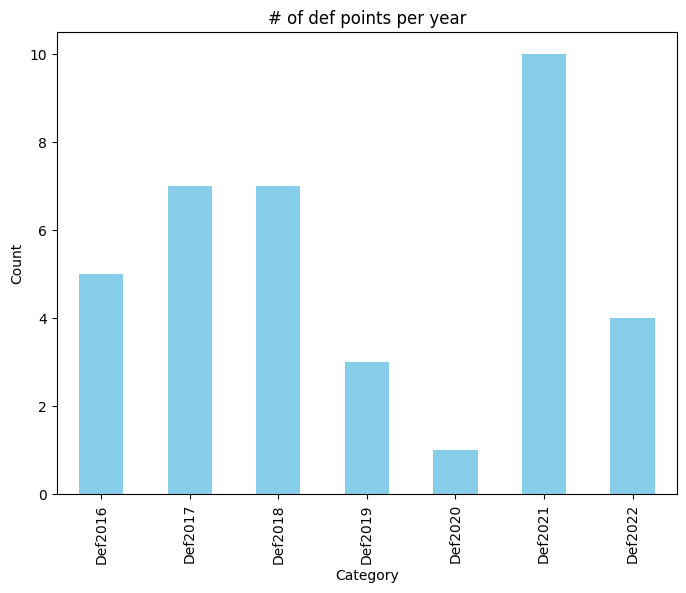

In [52]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

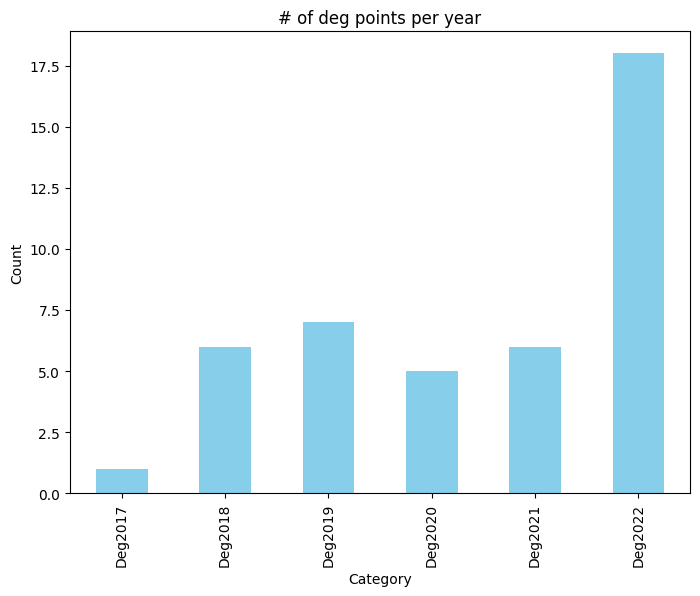

In [53]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [54]:
print(esbae_ceo.columns.values)

['geometry' 'point_id' 'mon_images' 'bfast_change_date' 'bfast_magnitude'
 'bfast_means' 'cusum_change_date' 'cusum_confidence' 'cusum_magnitude'
 'red_mean' 'red_sd' 'red_min' 'red_max' 'nir_mean' 'nir_sd' 'nir_min'
 'nir_max' 'swir1_mean' 'swir1_sd' 'swir1_min' 'swir1_max' 'swir2_mean'
 'swir2_sd' 'swir2_min' 'swir2_max' 'ndfi_mean' 'ndfi_sd' 'ndfi_min'
 'ndfi_max' 'brightness_mean' 'brightness_sd' 'brightness_min'
 'brightness_max' 'greenness_mean' 'greenness_sd' 'greenness_min'
 'greenness_max' 'wetness_mean' 'wetness_sd' 'wetness_min' 'wetness_max'
 'bs_slope_mean' 'bs_slope_sd' 'bs_slope_max' 'bs_slope_min'
 'ewma_jrc_date' 'ewma_jrc_change' 'ewma_jrc_magnitude' 'mosum_jrc_date'
 'mosum_jrc_change' 'mosum_jrc_magnitude' 'cusum_jrc_date'
 'cusum_jrc_change' 'cusum_jrc_magnitude' 'ccdc_change_date'
 'ccdc_magnitude' 'aspect' 'dw_class_mode' 'dw_tree_prob__max'
 'dw_tree_prob__min' 'dw_tree_prob__stdDev' 'dw_tree_prob_mean'
 'elevation' 'esa_lc20' 'esa_lc21' 'esri_lc17' 'esri_lc18' 

In [55]:
merged_annual_counts = esbae_ceo['Ref_Change_Year_1522'].value_counts()
merged_annual_counts = merged_annual_counts.sort_index()
merged_annual_counts

Ref_Change_Year_1522
Def2016       5
Def2017       7
Def2018       7
Def2019       3
Def2020       1
Def2021      10
Def2022       4
Deg2017       1
Deg2018       6
Deg2019       7
Deg2020       5
Deg2021       6
Deg2022      18
NF         2764
Stable     1533
Name: count, dtype: int64

In [56]:
LC_counts = esbae_ceo['Ref_LCover'].value_counts()
LC_counts = merged_annual_counts.sort_index()
LC_counts

Ref_Change_Year_1522
Def2016       5
Def2017       7
Def2018       7
Def2019       3
Def2020       1
Def2021      10
Def2022       4
Deg2017       1
Deg2018       6
Deg2019       7
Deg2020       5
Deg2021       6
Deg2022      18
NF         2764
Stable     1533
Name: count, dtype: int64

In [57]:
print(esbae_ceo.dtypes)

geometry                 object
point_id                float64
mon_images                int64
bfast_change_date       float64
bfast_magnitude         float64
bfast_means             float64
cusum_change_date       float64
cusum_confidence        float64
cusum_magnitude         float64
red_mean                float64
red_sd                  float64
red_min                 float64
red_max                 float64
nir_mean                float64
nir_sd                  float64
nir_min                 float64
nir_max                 float64
swir1_mean              float64
swir1_sd                float64
swir1_min               float64
swir1_max               float64
swir2_mean              float64
swir2_sd                float64
swir2_min               float64
swir2_max               float64
ndfi_mean               float64
ndfi_sd                 float64
ndfi_min                float64
ndfi_max                float64
brightness_mean         float64
brightness_sd           float64
brightne

In [58]:
columns_to_convert = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022','Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022','NF']
esbae_ceo[columns_to_convert] = esbae_ceo[columns_to_convert].fillna(0)
esbae_ceo[columns_to_convert] = esbae_ceo[columns_to_convert].astype(int)

### 6. export merged esbae and ceo data to one csv file for next step

In [64]:
esbae_ceo.to_csv(esbae_ceo_data_out,index=False)